In [1]:
import numpy as np
import keras
import pandas as pd 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM,Bidirectional,GlobalMaxPooling1D
import re
import tensorflow as tf
from keras.preprocessing.text import Tokenizer

In [2]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Activation, Conv2D, Input, Embedding, Reshape, MaxPool1D, Concatenate, Flatten, Dropout, Dense, Conv1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam,SGD
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/5-classes-bangla-sentiment-analysis-dataset/Bert_Preprocessed_5_classes_Dataset.xlsx


In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
df=pd.read_excel('/kaggle/input/5-classes-bangla-sentiment-analysis-dataset/Bert_Preprocessed_5_classes_Dataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13802 entries, 0 to 13801
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  13802 non-null  int64 
 1   Index       13802 non-null  int64 
 2   Text        13800 non-null  object
 3   Sentiment   13802 non-null  object
 4   Label       13802 non-null  int64 
 5   Token       13802 non-null  object
 6   Token_ID    13802 non-null  object
dtypes: int64(3), object(4)
memory usage: 754.9+ KB


In [7]:
df.head()

,Unnamed: 0,Index,Text,Sentiment,Label,Token,Token_ID
0,4068,4068,প্রথম আলোর উচিত হা হা রিএক্ট চালু করা,Positive,2,"['পর', '##থম', 'আলে', '##ার', 'উচিত', 'হা', 'হ...","[2076, 25492, 24182, 3187, 2351, 7725, 7725, 6..."
1,10991,10991,শ্রীলংকার সাথে সাকিব যেদিন আম্পায়ারদের ভুল সি...,Positive,2,"['শর', '##ীল', '##ংকার', 'সাথে', 'সাকিব', 'যেদ...","[14033, 36600, 62021, 2179, 4798, 9012, 5027, ..."
2,1072,1072,যেকোনো ব্যবসা প্রতিষ্ঠান সরকারের হাতে থাকলেই চ...,Very Negative,3,"['যে', '##কে', '##ানে', '##া', 'ব', '##যব', '#...","[2060, 2071, 31044, 2395, 5740, 69734, 6240, 5..."
3,1040,1040,তম হয়ে পাস করেছি মিস্টি বিতরণ করা হোক,Very Positive,4,"['তম', 'হয', '##ে', 'পাস', 'করেছি', 'মিস', '##...","[2380, 33668, 2094, 3094, 3267, 3139, 2294, 55..."
4,8099,8099,কারখানা খুব লাভ করেছে এই অজুহাতে আবার বেতন বাড়...,Neutral,1,"['কারখানা', 'খ', '##ব', 'লাভ', 'করেছে', 'এই', ...","[4234, 5356, 4282, 2325, 2124, 2045, 28867, 29..."
5,13257,13257,সন্তানদের পারিবারিক সামাজিক ও ধর্মীয় শিক্ষার ...,Negative,0,"['সন', '##তান', '##দের', 'পারিবারিক', 'সামাজিক...","[11799, 14917, 2237, 3492, 2486, 2038, 58618, ..."
6,4367,4367,রাজনৈতিক বেক্তিবরগের ফোনালাপ ফাঁসের দায় শতভাগ ...,Very Negative,3,"['রাজনৈতিক', 'বেক', '##তি', '##বর', '##গের', '...","[2279, 12551, 6399, 13168, 19447, 16359, 17344..."
7,4681,4681,কাক্কু হলো রাজনৈতিক কমেডিয়িান তার বক্তব্য ছাড়...,Positive,2,"['কাক', '##ক', 'হলে', '##া', 'রাজনৈতিক', 'কমেড...","[15900, 3012, 2153, 2395, 2279, 9658, 33983, 5..."
8,12650,12650,আমাদের দেশের শীর্ষ রাজনৈতিক নেতৃবৃন্দ সরকারী ব...,Neutral,1,"['আমাদের', 'দেশের', 'শী', '##র', '##ষ', 'রাজনৈ...","[2127, 2150, 34415, 2046, 14691, 2279, 10552, ..."
9,512,512,যাচাই করুন সোনাটা খাঁটি কিনা,Positive,2,"['যাচাই', 'করন', 'সে', '##ানা', '##টা', 'খাটি'...","[4825, 24611, 2118, 17344, 2551, 84080, 5070]"


<AxesSubplot:xlabel='Label', ylabel='count'>

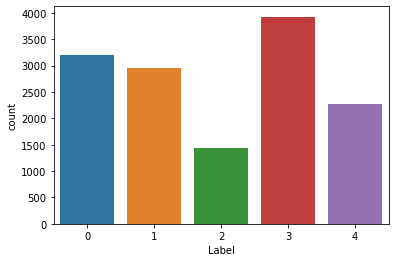

In [8]:
sns.countplot(df['Label'])

In [9]:
df.Label.value_counts(), len(df)

(3    3928
 0    3198
 1    2951
 4    2280
 2    1445
 Name: Label, dtype: int64,
 13802)

In [10]:
maxlen = 50
max_features = 10000
batch_size = 32

In [11]:
df['Token']=df['Token'].astype('str')

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['Token'],df['Label'] , test_size=0.1,random_state=2)
x_train, x_validation, y_train, y_validation = train_test_split(x_train,y_train,test_size=0.1,random_state=42)

In [13]:
vocab_size=32000

In [14]:
tokenizer  = Tokenizer(num_words = max_features,oov_token = "<OOV>")
tokenizer.fit_on_texts(df['Token'])

train_seq =  tokenizer.texts_to_sequences(x_train)
val_seq =  tokenizer.texts_to_sequences(x_validation)
test_seq = tokenizer.texts_to_sequences(x_test)

In [15]:
x_train = pad_sequences(train_seq, maxlen=maxlen, dtype='int32', padding='post',truncating='post') #maxlen = maxlen, padding='post')
x_validation = pad_sequences(val_seq, maxlen=maxlen, dtype='int32', padding='post',truncating='post') #maxlen = maxlen, padding='post')
x_test = pad_sequences(test_seq, maxlen=maxlen, dtype='int32', padding='post',truncating='post') #maxlen = maxlen, padding='post')

In [19]:
model= Sequential()
model.add(Embedding(vocab_size,100,input_length=maxlen,name='Embedding'))
model.add(Conv1D(200, kernel_size=3, activation = "relu"))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.25))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(12, activation='relu'))
model.add(Flatten())
model.add(Dense(units=5, activation='softmax'))
adam=Adam(learning_rate=0.003)
model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 50, 100)           3200000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 48, 200)           60200     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 200)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)               

In [20]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=15,
    min_delta=0.001,
    restore_best_weights=True,
)

In [21]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=30, callbacks=[early_stopping],verbose=1, validation_data=(x_validation, y_validation))

Epoch 1/30
350/350 [==============================] - 13s 34ms/step - loss: 1.5572 - accuracy: 0.2863 - val_loss: 1.5058 - val_accuracy: 0.3411
Epoch 2/30
350/350 [==============================] - 12s 35ms/step - loss: 1.4747 - accuracy: 0.3427 - val_loss: 1.4952 - val_accuracy: 0.3307
Epoch 3/30
350/350 [==============================] - 12s 33ms/step - loss: 1.3605 - accuracy: 0.3988 - val_loss: 1.5147 - val_accuracy: 0.3508
Epoch 4/30
350/350 [==============================] - 12s 35ms/step - loss: 1.2101 - accuracy: 0.4698 - val_loss: 1.6096 - val_accuracy: 0.3371
Epoch 5/30
350/350 [==============================] - 12s 34ms/step - loss: 1.0196 - accuracy: 0.5499 - val_loss: 1.8193 - val_accuracy: 0.2961
Epoch 6/30
350/350 [==============================] - 12s 34ms/step - loss: 0.8625 - accuracy: 0.6333 - val_loss: 2.2243 - val_accuracy: 0.3146
Epoch 7/30
350/350 [==============================] - 12s 36ms/step - loss: 0.7298 - accuracy: 0.7000 - val_loss: 2.4457 - val_accuracy:

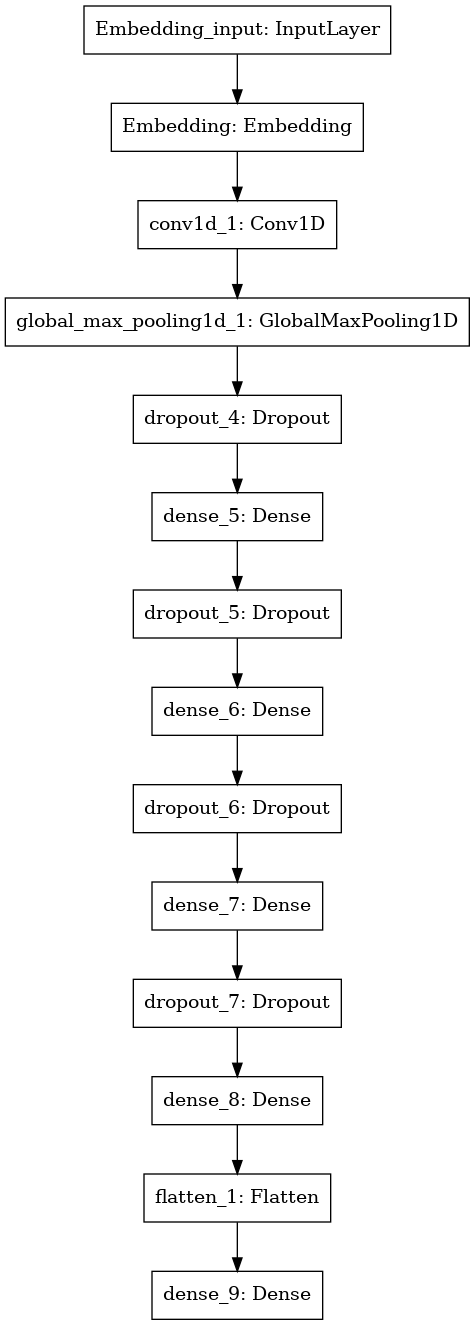

In [22]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=False,show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [23]:
model.evaluate(x_test, y_test)

44/44 [==============================] - 0s 4ms/step - loss: 1.5026 - accuracy: 0.3215


[1.5026241540908813, 0.321506142616272]

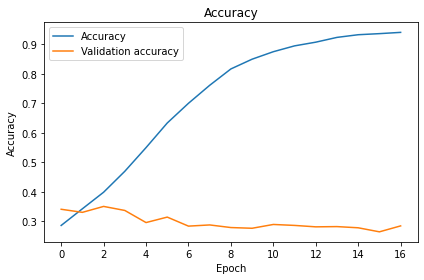

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label="Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('5 classes CNN Val_acc.png',format='png',transparent='True')
plt.show()


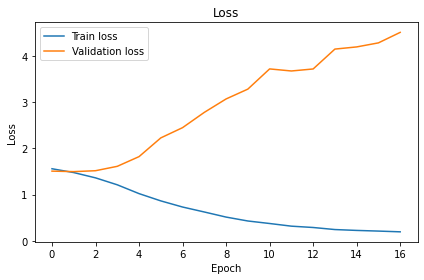

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label="Train loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.savefig('5 classes CNN Val_loss.png',format='png',transparent='True')
plt.show()

In [26]:
from sklearn.metrics import classification_report

y_pred_raw = model.predict(x_test)
y_pred = np.argmax(y_pred_raw,axis=1)

In [27]:
print(y_test.shape)
print(y_pred.shape)

(1381,)
(1381,)


In [28]:
y_pred = y_pred.reshape(-1,1)


In [30]:
categories = ['0','1','2','3','4']
print(classification_report(y_test, y_pred, target_names=categories))

              precision    recall  f1-score   support

           0       0.17      0.03      0.06       322
           1       0.26      0.13      0.17       293
           2       0.00      0.00      0.00       129
           3       0.38      0.59      0.46       405
           4       0.29      0.68      0.40       232

    accuracy                           0.32      1381
   macro avg       0.22      0.29      0.22      1381
weighted avg       0.25      0.32      0.25      1381



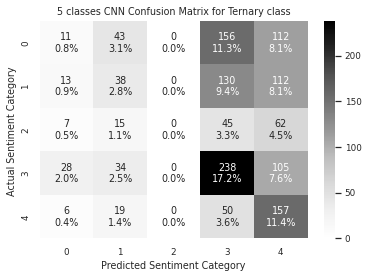

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.1%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(5,5)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('5 classes CNN Confusion Matrix for Ternary class');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels(['0','1','2','3','4'])
ax.yaxis.set_ticklabels(['0','1','2','3','4'])
sns.set(color_codes=True)
sns.set(font_scale=.8)
plt.savefig('5 classes CNN Confusion Matrix for Ternary class.png', bbox_inches = "tight")
plt.show()

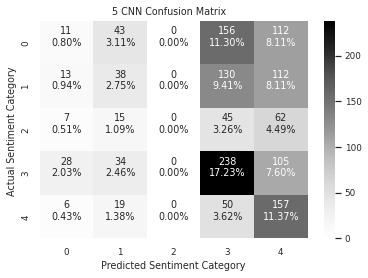

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(5,5)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('5 CNN Confusion Matrix   ');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels(['0','1','2','3','4'])
ax.yaxis.set_ticklabels(['0','1','2','3','4'])
sns.set(color_codes=True)
sns.set(font_scale=1.3)
plt.savefig('5 classes CNN Confusion Matrix.png', bbox_inches = "tight")
plt.show()

Accuracy: 0.32
Auc: 0.61
Detail:
              precision    recall  f1-score   support

           0       0.17      0.03      0.06       322
           1       0.26      0.13      0.17       293
           2       0.00      0.00      0.00       129
           3       0.38      0.59      0.46       405
           4       0.29      0.68      0.40       232

    accuracy                           0.32      1381
   macro avg       0.22      0.29      0.22      1381
weighted avg       0.25      0.32      0.25      1381



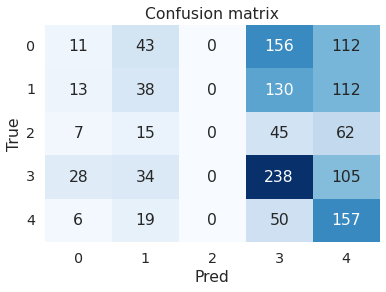

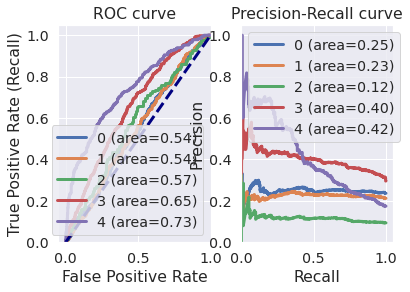

In [43]:
#!pip install metrics
import sklearn.metrics as metrics
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
accuracy = metrics.accuracy_score(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred_raw, 
                            multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, y_pred))
    
## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           y_pred_raw[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="ROC curve")
ax[0].legend(loc="lower right")
ax[0].grid(True)
plt.savefig('5 classes CNN ROC.png', bbox_inches = "tight")
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], y_pred_raw[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.savefig('5 classes CNN precision-recall curve.png', bbox_inches = "tight")
plt.show()
